In [1]:
# Importing libraries

import pandas as pd
import numpy as np

In [4]:
#Load the dataset
df1 = pd.read_excel("nlp_preproccessed_data.xlsx")
df1.sample(5)

,order_id,reviews,label
28599,fe49c4a1416840f8ed6bd36daac85aae,timo produto bom bom qualidade chegar antar pr...,1
28054,0c065ce922f289db756e5505cb2d71d7,p ssimo mercadoria porcaria propaganda enganos...,0
14921,303deafb916b70339ff5c11be8039888,chegar perfazer obrigar,1
11947,41fecd3ee080963d54b99007e1393f97,sempre receber produto dentro prazo m s dessar...,0
3463,fe9eb7fc7765ab4b09f817fda0b63089,apesar fazer pedir telefonar prazo dar n cumprir,0


In [5]:
text = df1['reviews']

## Bag Of Words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
cv = CountVectorizer(decode_error='replace', encoding='utf-8', max_features=7000)
X_bow = cv.fit_transform(text.values.astype('U')).toarray()

In [8]:
X_bow.shape

(38573, 7000)

## TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(decode_error='replace', encoding='utf-8', max_features=7000)


In [10]:
X_tfidf = tfidf_v.fit_transform(text.values.astype('U')).toarray()

In [11]:
X_tfidf.shape

(38573, 7000)

## Model Building

### Train_Test_Split 
### training data 80% and testing data 20%

In [12]:
from sklearn.model_selection import train_test_split

y = df1["label"]

In [13]:
# for bag of words
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bow, y, test_size=0.2, random_state = 20)

# for tf-idf
Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state = 20)

## Finding the best model using GridSearchCV
### here we use 3 model
### 1. Logistic Regression
### 2. Naive Bayes Multinomial
### 3. Random Forest

In [14]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(X,y):
 algos = {
     
 'logistic_regression' : {
 'model': LogisticRegression(),
 'params': {
 'penalty': ["l2"]
 }
 },
     
 'naive_bayes': {
 'model': MultinomialNB(),
 'params': {
 'alpha': [1]   
 }
 },

 'random_forest': {
 'model': RandomForestClassifier(),
 'params': {
 'n_estimators': [100]    
 }
 }
 }

 scores = []
 cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
 for algo_name, config in algos.items():
  gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
  gs.fit(X,y)
  scores.append({
  'model': algo_name,
  'best_score': gs.best_score_,
  'best_params': gs.best_params_
  })
 return pd.DataFrame(scores,columns=['model','best_score','best_params'])

### Finding the best model According to 
## Bag of Wrds 

In [15]:
find_best_model_using_gridsearchcv(Xb_train,yb_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,model,best_score,best_params
0,logistic_regression,0.871290,{'penalty': 'l2'}
1,naive_bayes,0.861471,{'alpha': 1}
2,random_forest,0.869961,{'n_estimators': 100}


### Finding the best model According to 
## TF-IDF


In [16]:
find_best_model_using_gridsearchcv(Xtf_train,ytf_train)

,model,best_score,best_params
0,logistic_regression,0.874984,{'penalty': 'l2'}
1,naive_bayes,0.860078,{'alpha': 1}
2,random_forest,0.868957,{'n_estimators': 100}


### For all models, the difference between using Bag of Words or TF-IDF is very small.
### In case of Bag of Words thebBest model is Logistic Regression with Score of 0.871
### and in case of TF-IDF the Best Model is Again Logisci Regression Classifier with Score of 0.875

### So we can choose Logistic Regression Classifier as our best model 


## Make a Logistic Regression Classifier Model to Predict Sentiments

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
# Trainin the Logistic Regression model along with tf-idf proccessed data
# as the model score is good so we can use default parameter for Logistic Regression Classifier

classifier = LogisticRegression()

classifier.fit(Xtf_train, ytf_train)


LogisticRegression()

In [31]:
# predict y with the respect of Xtf_test

y_prediction = classifier.predict(Xtf_test)

## Checking Accuracy_Score, Confusion_Matrix, F1_Score

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
# Creat a Function that receives main y values, predicted y values and shows metrics.

def show_all_matrices(y_main, y_pred):
  print("Acuracy Score: ", accuracy_score(y_main, y_pred))
  print("\nF1-Score:", f1_score(y_main, y_pred, average='weighted'))
  print("\nConfution Matrics:")
  sns.heatmap(confusion_matrix(y_main, y_pred), annot=True)
  plt.show()

Acuracy Score:  0.8830848995463383

F1-Score: 0.8827307370594932

Confution Matrics:


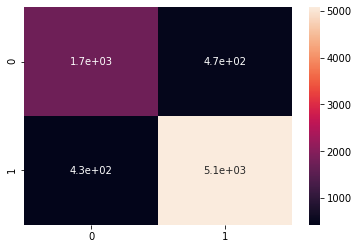

In [34]:
show_all_matrices(ytf_test, y_prediction)

In [35]:
confusion_matrix(ytf_test, y_prediction) # for better view

array([[1740,  473],
       [ 429, 5073]])

In [36]:
from sklearn.metrics import classification_report
classification_report(ytf_test, y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79      2213\n           1       0.91      0.92      0.92      5502\n\n    accuracy                           0.88      7715\n   macro avg       0.86      0.85      0.86      7715\nweighted avg       0.88      0.88      0.88      7715\n'

### Save the model into a Pickle File

In [37]:
import pickle
with open ('sentiment_analysis_random_f','wb') as f:
    pickle.dump (classifier, f)

#### Test the model with New Reviews

In [38]:
# Create a Function that receives a sentence and prints sentiment result make by our model.

def prediction(text):
    vectorized_text = tfidf_v.transform([text])
    predict = classifier.predict(vectorized_text)

    if predict == 0:
        print("This is a Negative review")
    else:
        print("This is a Positive review")

In [39]:
prediction("Eu amo esse produto") # I love this product (translate using google translator)

This is a Positive review


In [40]:
prediction("Este produto é ruim. Você quebra minha confiança") # This product is bad. You breaks my trust

This is a Negative review
